<a href="https://colab.research.google.com/github/ohsang14/school_python/blob/main/%EC%8B%A4%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
from math import sqrt

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)


plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2

import pandas as pd
drama=pd.read_csv('top100_kdrama.csv')
drama.head()

Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1


In [2]:
drama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               100 non-null    object 
 1   Year of release    100 non-null    int64  
 2   Aired Date         100 non-null    object 
 3   Aired On           100 non-null    object 
 4   Number of Episode  100 non-null    int64  
 5   Network            100 non-null    object 
 6   Duration           100 non-null    object 
 7   Content Rating     100 non-null    object 
 8   Synopsis           100 non-null    object 
 9   Cast               100 non-null    object 
 10  Genre              100 non-null    object 
 11  Tags               100 non-null    object 
 12  Rank               100 non-null    object 
 13  Rating             100 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 11.1+ KB


In [3]:
drama.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.970000,19.070000,8.723000
std,2.869044,12.378096,0.174573
min,2003.000000,6.000000,8.500000
25%,2017.000000,16.000000,8.600000
50%,2019.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000


In [5]:
d=drama.sort_values('Year of release')
d.head(5)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
62,The Bridal Mask,2012,"May 30, 2012 - Sep 6, 2012","Wednesday, Thursday",28,KBS2,1 hr. 5 min.,15+ - Teens 15 or older,Lee Kang To is an ambitious and callous Korean...,"Joo Won, Jin Se Yeon, Park Ki Woong, Han Chae ...","Action, Historical, Romance, Political","Japanese Colonial Rule, Hidden Identity, Reven...",#63,8.6
88,Reply 1997,2012,"Jul 24, 2012 - Sep 18, 2012",Tuesday,16,tvN,60 min.,15+ - Teens 15 or older,"Set in the 1990's, the drama centers around a ...","Jung Eun Ji, Seo In Guk, Hoya, Shin So Yool, E...","Comedy, Romance, Life, Family","Childhood Friends, High School, 1990s, Strong ...",#89,8.5
80,The Master's Sun,2013,"Aug 7, 2013 - Oct 3, 2013","Wednesday, Thursday",17,SBS,1 hr. 2 min.,15+ - Teens 15 or older,Joo Joong Won is the stingy and greedy CEO of ...,"Gong Hyo Jin, So Ji Sub, Seo In Guk, Kim Yoo R...","Horror, Comedy, Romance, Supernatural","Ghost, Eccentric Female Lead, Rich Male Lead, ...",#81,8.6
74,Cruel City,2013,"May 27, 2013 - Jul 30, 2013","Monday, Tuesday",20,jTBC,60 min.,15+ - Teens 15 or older,Portrays the cruel life of the drug cartels an...,"Jung Kyung Ho, Nam Gyu Ri, Lee Jae Yoon, Son C...","Action, Thriller, Romance, Crime","Badass Male Lead, Gang, Bromance, Strong Femal...",#75,8.6


In [6]:
d = drama.sort_values('Number of Episode', ascending=False)
d.head(5)


,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6
64,Jewel in the Palace,2003,"Sep 15, 2003 - Mar 23, 2004","Monday, Tuesday",54,MBC,1 hr. 5 min.,13+ - Teens 13 or older,About 500 years ago during the time of Chosun ...,"Lee Young Ae, Ji Jin Hee, Hong Ri Na, Im Ho, Y...","Food, Historical, Romance, Medical","Cooking, Strong Female Lead, Royal Rules And E...",#65,8.6
65,My Father is Strange,2017,"Mar 4, 2017 - Aug 27, 2017","Saturday, Sunday",52,KBS2,1 hr. 6 min.,15+ - Teens 15 or older,This drama is about a family that lives on the...,"Kim Yeong Cheol, Kim Hae Sook, Ryu Soo Young, ...","Comedy, Romance, Drama, Family","Family Secret, Sisterhood, Eccentric Female Le...",#66,8.6
71,Empress Ki,2013,"Oct 28, 2013 - Apr 29, 2014","Monday, Tuesday",51,MBC,1 hr. 5 min.,15+ - Teens 15 or older,Genghis Khan built an empire that spanned vast...,"Ha Ji Won, Ji Chang Wook, Joo Jin Mo, Baek Jin...","Historical, Romance, Melodrama, Political","Smart Female Lead, Strong Female Lead, Power S...",#72,8.6
32,Six Flying Dragons,2015,"Oct 5, 2015 - Mar 22, 2016","Monday, Tuesday",50,SBS,60 min.,15+ - Teens 15 or older,"A fiction historical drama about the ambition,...","Yoo Ah In, Kim Myung Min, Shin Se Kyung, Byun ...","Action, Historical, Drama, Political","Revolution, Power Struggle, Political Intrigue...",#33,8.8


In [7]:
count = drama['Year of release'].value_counts()
count
pd.DataFrame(count)

,count
Year of release,
2021,19
2020,17
2017,16
2019,15
2018,10
2016,8
2013,5
2014,4
2015,3


In [8]:
count = drama['Rating'].value_counts(ascending=True)
count
pd.DataFrame(count)

,count
Rating,
9.2,1
9.1,5
8.9,5
9.0,9
8.5,15
8.8,16
8.7,24
8.6,25


In [9]:
count = drama['Network'].value_counts()
pd.DataFrame(count)

,count
Network,
tvN,19
SBS,17
"Netflix, tvN",16
KBS2,10
MBC,9
jTBC,8
Netflix,7
OCN,7
"Netflix, SBS",2


In [10]:
drama[['Name', 'Rating']]
# drama.loc[:, ['Name', 'Rating']]
# drama.iloc[:, [0, -1]]

,Name,Rating
0,Move to Heaven,9.2
1,Hospital Playlist,9.1
2,Flower of Evil,9.1
3,Hospital Playlist 2,9.1
4,My Mister,9.1
...,...,...
95,Vagabond,8.5
96,Doctor John,8.5
97,When the Camellia Blooms,8.5
98,Because This Is My First Life,8.5


In [11]:
d = drama['Number of Episode'] == drama['Number of Episode'].max()
drama[d]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
81,Once Again,2020,"Mar 28, 2020 - Sep 13, 2020","Saturday, Sunday",100,KBS2,35 min.,15+ - Teens 15 or older,"""Once Again"" is the story of the eventful Song...","Chun Ho Jin, Cha Hwa Yun, Lee Jung Eun, Oh Dae...","Comedy, Romance, Drama, Family","Divorce, Family Relationship, Multiple Couples...",#82,8.6


In [12]:
d = drama['Number of Episode'] == drama['Number of Episode'].min()
drama[d]['Name']

,Name
16,Kingdom
23,D.P.
24,Kingdom
45,Arthdal Chronicles Part 2
47,Arthdal Chronicles Part 3
92,Arthdal Chronicles Part 1


In [13]:
d = drama['Network'].str.contains('Netflix')
drama[d].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [14]:
d = drama['Network'].str.contains('Netflix | tvN')
drama[d].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,Netflix,52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0


In [15]:
target = ['Netflix', 'tvN']
d = drama['Network'].map(lambda x: all(string in x for string in target))
drama[d].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
3,Hospital Playlist 2,2021,"Jun 17, 2021 - Sep 16, 2021",Thursday,12,"Netflix, tvN",1 hr. 40 min.,15+ - Teens 15 or older,Everyday is extraordinary for five doctors and...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",#4,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
7,It's Okay to Not Be Okay,2020,"Jun 20, 2020 - Aug 9, 2020","Saturday, Sunday",16,"Netflix, tvN",1 hr. 15 min.,15+ - Teens 15 or older,Moon Gang Tae is a community health worker at ...,"Kim Soo Hyun, Seo Yea Ji, Oh Jung Se, Park Gyu...","Psychological, Comedy, Romance, Drama","Sibling Relationship, Melodrama, Mental Health...",#8,9.0
11,Navillera,2021,"Mar 22, 2021 - Apr 27, 2021","Monday, Tuesday",12,"Netflix, tvN",1 hr. 5 min.,15+ - Teens 15 or older,A 70-year-old with a dream and a 23-year-old w...,"Park In Hwan, Song Kang, Na Moon Hee, Hong Seu...","Friendship, Life, Drama, Family","Ballet, Dream, Life Lesson, Old-Young Generati...",#12,9.0


In [16]:
d = (drama['Year of release'] >= 2015) & (drama['Year of release'] <= 2020)
drama[d].head()

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"Netflix, tvN",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1
4,My Mister,2018,"Mar 21, 2018 - May 17, 2018","Wednesday, Thursday",16,tvN,1 hr. 17 min.,15+ - Teens 15 or older,Park Dong Hoon is a middle-aged engineer who i...,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...","Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...",#5,9.1
5,Prison Playbook,2017,"Nov 22, 2017 - Jan 18, 2018","Wednesday, Thursday",16,"Netflix, tvN",1 hr. 32 min.,15+ - Teens 15 or older,"Kim Je Hyuk, a famous baseball player, is arre...","Park Hae Soo, Jung Kyung Ho, Krystal Jung, Im ...","Comedy, Crime, Life, Drama","Prison, Bromance, Wrongfully Accused, Life Les...",#6,9.1
6,Reply 1988,2015,"Nov 6, 2015 - Jan 16, 2016","Friday, Saturday",20,tvN,1 hr. 40 min.,15+ - Teens 15 or older,"Five childhood friends, who all live in the sa...","Lee Hye Ri, Go Kyung Pyo, Ryu Joon Yeol, Park ...","Comedy, Romance, Youth, Family","Neighbors, Slice Of Life, Childhood Friends, M...",#7,9.0


In [17]:
col = ['Aired Date', 'Duration', 'Synopsis', 'Cast', 'Tags']
newdrama = drama.drop(col, axis=1)
newdrama.columns

Index(['Name', 'Year of release', 'Aired On', 'Number of Episode', 'Network',
       'Content Rating', 'Genre', 'Rank', 'Rating'],
      dtype='object')

In [18]:
newdrama.columns = ['이름', '개봉년도', '요일', '에피소드수', '네트워크', '등급', '장르', '순위', '평점']
newdrama.columns

Index(['이름', '개봉년도', '요일', '에피소드수', '네트워크', '등급', '장르', '순위', '평점'], dtype='object')

In [19]:
newdrama['장르개수'] = newdrama['장르'].str.count(',') + 1
newdrama.head()

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르개수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1,4
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1,4
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1,4


In [20]:
newdrama['네트워크개수'] = newdrama['네트워크'].str.count(',') + 1
newdrama.head()

,이름,개봉년도,요일,에피소드수,네트워크,등급,장르,순위,평점,장르개수,네트워크개수
0,Move to Heaven,2021,Friday,10,Netflix,18+ Restricted (violence & profanity),"Life, Drama, Family",#1,9.2,3,1
1,Hospital Playlist,2020,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#2,9.1,4,2
2,Flower of Evil,2020,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Thriller, Romance, Crime, Melodrama",#3,9.1,4,1
3,Hospital Playlist 2,2021,Thursday,12,"Netflix, tvN",15+ - Teens 15 or older,"Friendship, Romance, Life, Medical",#4,9.1,4,2
4,My Mister,2018,"Wednesday, Thursday",16,tvN,15+ - Teens 15 or older,"Psychological, Life, Drama, Family",#5,9.1,4,1


In [21]:
d = newdrama.groupby('개봉년도')['평점'].mean()
pd.DataFrame(d)

,평점
개봉년도,
2003,8.600000
2012,8.550000
2013,8.580000
2014,8.700000
2015,8.833333
2016,8.750000
2017,8.662500
2018,8.790000
2019,8.646667


In [22]:
d = newdrama.groupby('개봉년도')['이름'].count()
pd.DataFrame(d)


,이름
개봉년도,
2003,1
2012,2
2013,5
2014,4
2015,3
2016,8
2017,16
2018,10
2019,15


In [23]:
d = newdrama.groupby(['개봉년도', '평점'])['이름'].count()
pd.DataFrame(d).head(10)

이름
개봉년도 평점     
2003 8.6   1
2012 8.5   1
     8.6   1
2013 8.5   1
     8.6   4
2014 8.6   2
     8.7   1
     8.9   1
2015 8.7   1
     8.8   1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

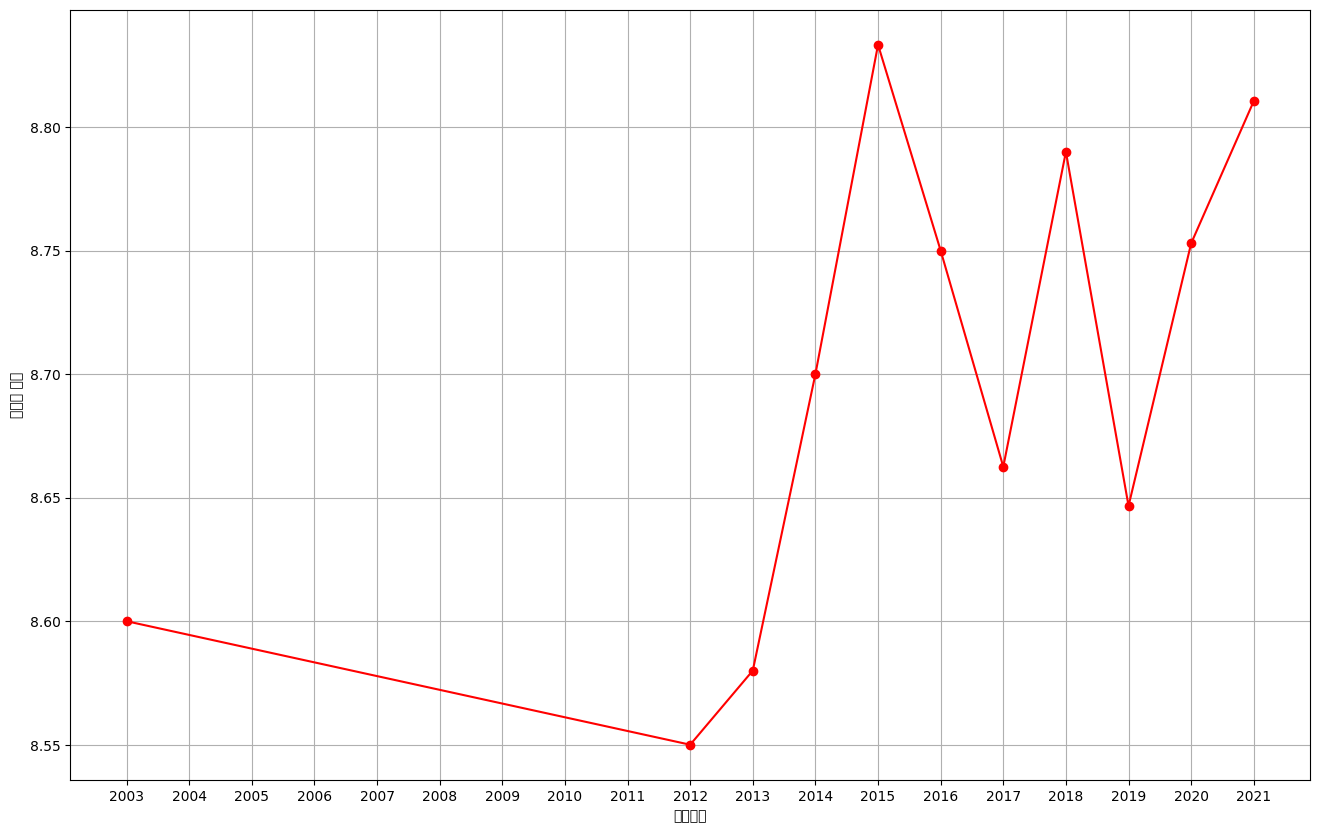

In [24]:
import matplotlib.pyplot as plt
import numpy as np

data = newdrama.groupby('개봉년도')['평점'].mean()
plt.figure(figsize=(16, 10))
plt.plot(data, color='r', marker='o')
plt.xticks(np.arange(2003, 2022))
plt.xlabel('개봉년도')
plt.ylabel('평점의 평균')
plt.grid()
plt.show()

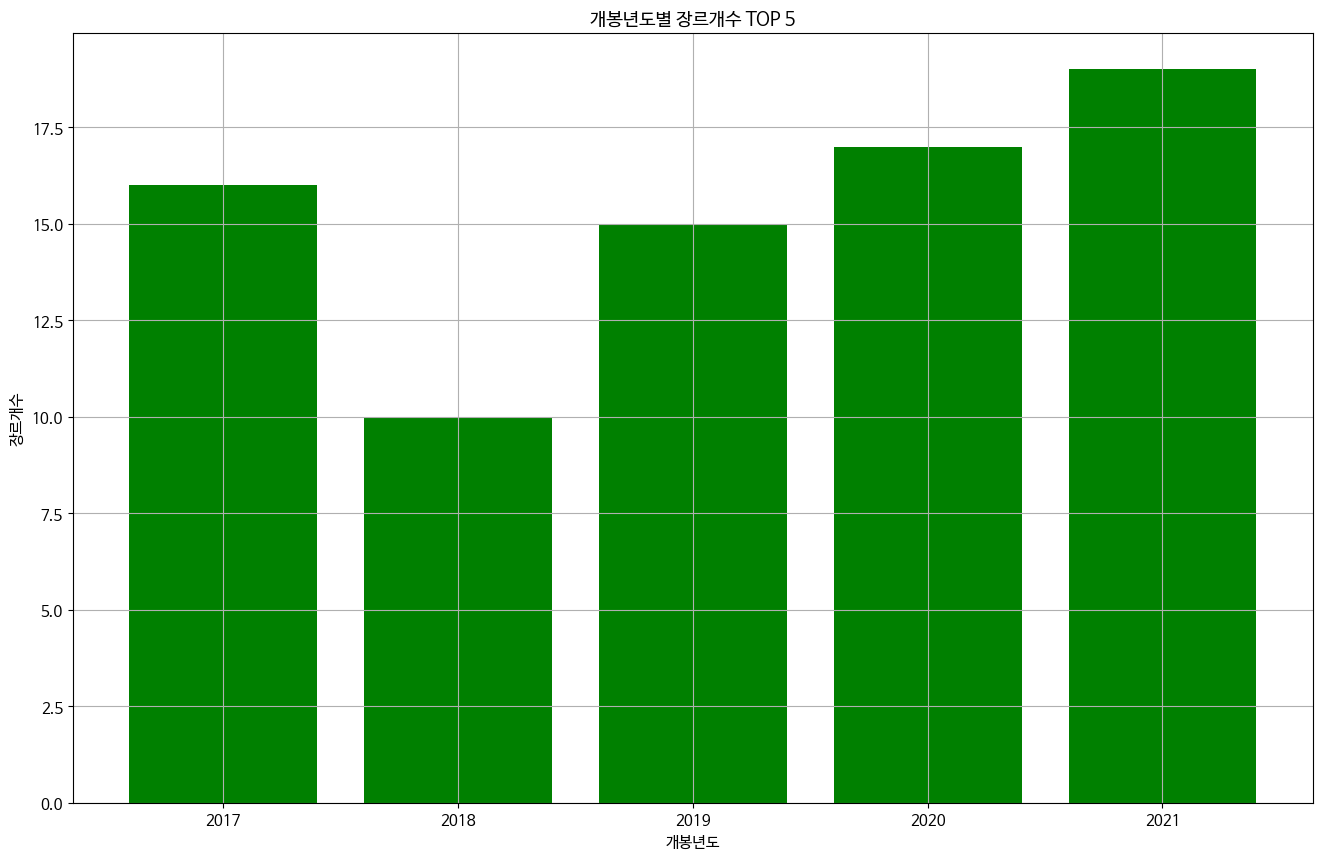

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

top5 = newdrama['개봉년도'].value_counts().head(5)
plt.figure(figsize=(16, 10))
plt.bar(top5.index, top5, color='g')
plt.xlabel('개봉년도')
plt.ylabel('장르개수')
plt.title('개봉년도별 장르개수 TOP 5')
plt.grid()
plt.show()

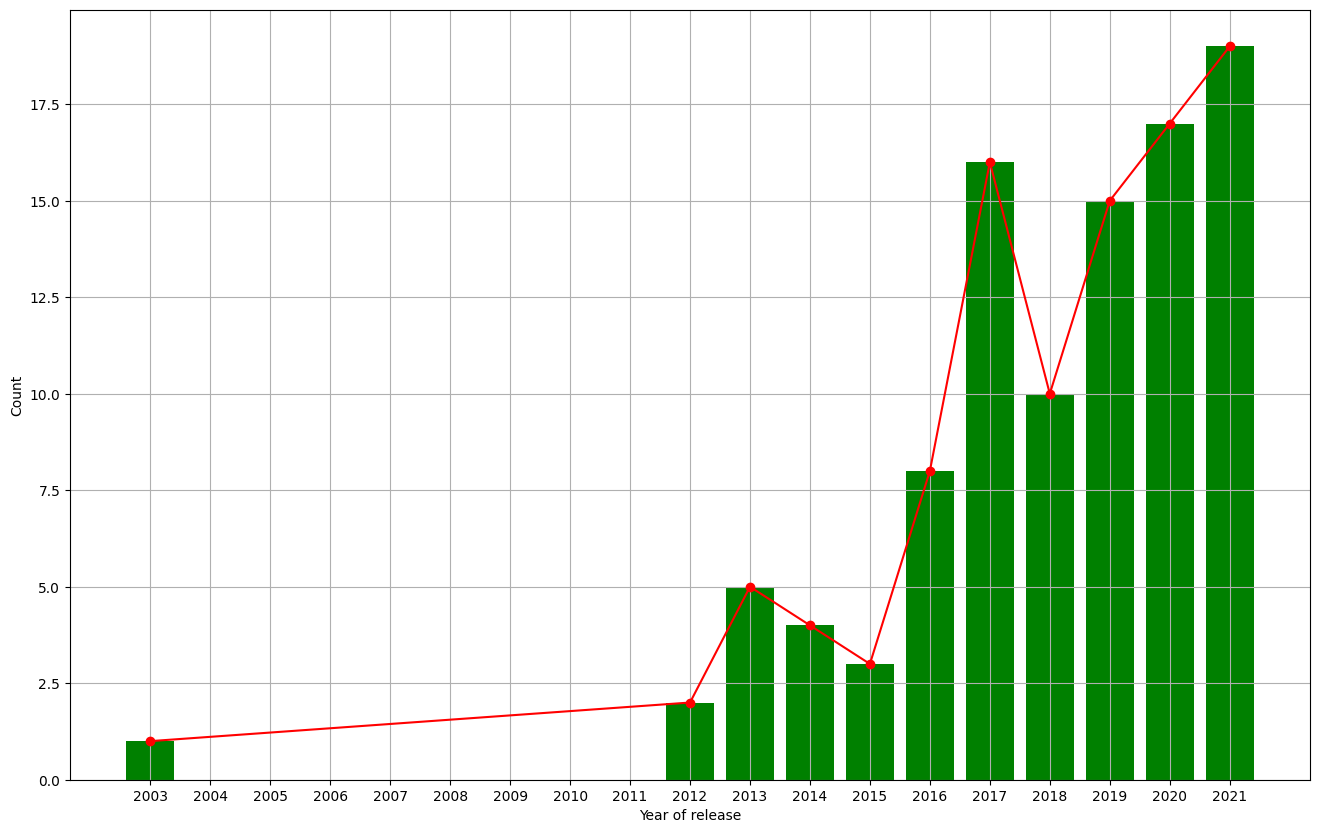

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

year_Count = newdrama.groupby('개봉년도').size()
plt.figure(figsize=(16, 10))
plt.plot(year_Count, color='r', marker='o')
plt.bar(year_Count.index, year_Count, color='g')
plt.xticks(np.arange(2003, 2022))
plt.xlabel('Year of release')
plt.ylabel('Count')
plt.grid()
plt.show()

In [27]:
from collections import Counter
import pandas as pd

newdrama['장르'] = newdrama['장르'].str.strip()
genre_list = []

for genres in newdrama['장르'].to_list():
    genres = genres.split(", ")
    for gen in genres:
        genre_list.append(gen)

genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient='index', columns=['Count'])
genre_df.sort_values('Count', ascending=False, inplace=True)
genre_df.head()

,Count
Drama,51
Romance,46
Mystery,25
Thriller,21
Comedy,21


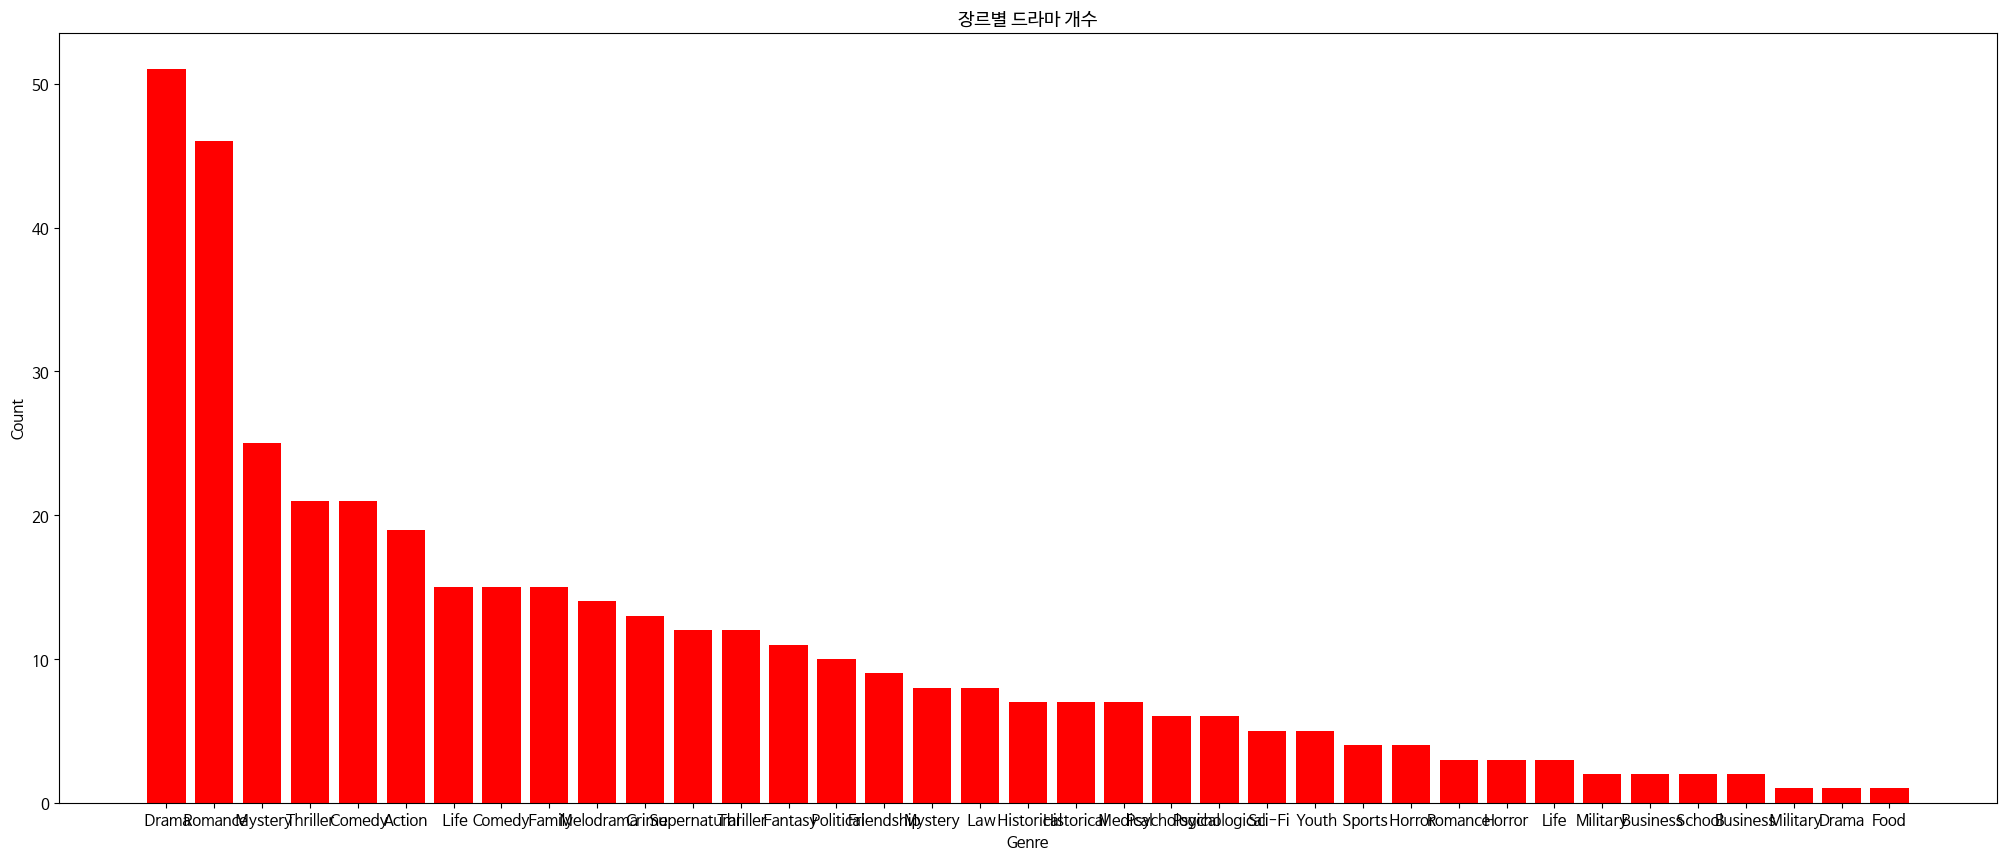

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 10))
plt.bar(genre_df.index, genre_df['Count'], color='r')
plt.title('장르별 드라마 개수')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()